# 0.&nbsp;Information About Group 9
---
*   **Student ID:** 20520278
*   **Full Name:** Phạm Hoàng Phúc
---
*   **Student ID:** 20520795
*   **Full Name:** Nguyễn Minh Thuận
---
*   **Student ID:** 20520816
*   **Full Name:** Đỗ Thị Thu Trang
---
*   **Student ID:** 20521641
*   **Full Name:** Nguyễn Thị Ngọc Nga

# 1.&nbsp;Import Libraries

In [55]:
# To process the string
import re

# To calculate in linear algebra
import numpy as np

# To manage data in dataframe
import pandas as pd

# To draw chart types
import seaborn as sns
import matplotlib.pyplot as plt

# To calculate statistical values
import scipy.stats as stats

# To convert string categorical variables to numbers
from sklearn.preprocessing import LabelEncoder

# 2.&nbsp;Prepare Data

In [56]:
# Set the path to train and test dataset
train_path = "../../Experiment/Dataset/Raw/Train.csv"
test_path = "../../Experiment/Dataset/Raw/Test.csv"

## 2.1.&nbsp;Load Data

In [57]:
# Load the train dataset and view information
train_df = pd.read_csv(train_path)
train_df.info()

# The train dataset has 100000 rows with 28 columns (27 features and 1 label). 
# It includes many missing data as well as many data types in the same attribute.

C:\Users\hoang\AppData\Local\Temp\ipykernel_18212\1225727181.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [58]:
# Load the test dataset and view information
test_df = pd.read_csv(test_path)
test_df.info()

# The test dataset has 50000 rows with 27 columns (27 features and no labels).
# It has less missing data than the train dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [59]:
# Concatenate the train and test datasets together and re-index
df = pd.concat([train_df, test_df], ignore_index=True)
df.info()

# Since the test dataset has no labels, we will only work on the train dataset. 
# The test set will be used to support the cleaning process 
# As well as preprocessing the train data for training.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

## 2.2.&nbsp;Check Data

In [60]:
def missing_data_table(df):
    """
    Create a DataFrame containing information about missing data in columns.

    Parameters:
    - df: DataFrame to be checked.

    Returns:
    DataFrame containing information about missing data.
    """

    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing Values': df.isnull().sum(),
        'Percentage Missing': (df.isnull().sum() / len(df)) * 100
    })

    # Filter columns with missing data and sort by descending
    missing_data = missing_data[missing_data['Missing Values'] > 0]
    missing_data = missing_data.sort_values(
        by="Percentage Missing", ascending=False)
    missing_data.index = range(len(missing_data))  # Re-index

    return missing_data

In [61]:
# Check for columns with missing data in the train dataframe
missing_data_table(train_df)

,Column,Missing Values,Percentage Missing
0,Monthly_Inhand_Salary,15002,15.002
1,Type_of_Loan,11408,11.408
2,Name,9985,9.985
3,Credit_History_Age,9030,9.030
4,Num_of_Delayed_Payment,7002,7.002
5,Amount_invested_monthly,4479,4.479
6,Num_Credit_Inquiries,1965,1.965
7,Monthly_Balance,1200,1.200


In [62]:
# Check for columns with missing data in the test dataframe
missing_data_table(test_df)

,Column,Missing Values,Percentage Missing
0,Monthly_Inhand_Salary,7498,14.996
1,Type_of_Loan,5704,11.408
2,Name,5015,10.030
3,Credit_History_Age,4470,8.940
4,Num_of_Delayed_Payment,3498,6.996
5,Amount_invested_monthly,2271,4.542
6,Num_Credit_Inquiries,1035,2.070
7,Monthly_Balance,562,1.124


In [63]:
# Check for columns with missing data in the concatenated dataframe
missing_data_table(df.iloc[:, :-1])

,Column,Missing Values,Percentage Missing
0,Monthly_Inhand_Salary,22500,15.000000
1,Type_of_Loan,17112,11.408000
2,Name,15000,10.000000
3,Credit_History_Age,13500,9.000000
4,Num_of_Delayed_Payment,10500,7.000000
5,Amount_invested_monthly,6750,4.500000
6,Num_Credit_Inquiries,3000,2.000000
7,Monthly_Balance,1762,1.174667


# 3.&nbsp;Cleaning Data

## 3.1.&nbsp;Fixing Data Type

In [64]:
# Create some functions used for data cleaning
def text_cleaning(data, characters_to_strip='_ ,"'):
    """
    Clean the input text data.

    Parameters:
    - data: Input data to be cleaned.
    - characters_to_strip: Characters to be stripped from the input data.

    Returns:
    Cleaned data after stripping specified characters.
    """

    if data is np.NaN or not isinstance(data, str):
        return data

    return str(data).strip(characters_to_strip)


def convert_years_months_to_months(time_str):
    """
    Convert a string representation of years and months to a total number of months.

    Parameters:
    - time_str: Input string representing years and months (e.g., '27 Years and 9 Months').

    Returns:
    Total number of months representing the converted time.
    """

    # Check if the input is not null
    if pd.notnull(time_str):
        # Extract years and months from the input string
        years, months = map(int, re.findall(r'\d+', time_str))

        # Convert years and months to total months
        total_months = (years * 12) + months

        return total_months

    # Return the input if it's null
    return time_str

In [65]:
# Clean the text in each element of the DataFrame using the text_cleaning function.
# And replace specific values with np.NaN.
df = df.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
missing_data_table(df.iloc[:, :-1])

,Column,Missing Values,Percentage Missing
0,Credit_Mix,30000,20.000000
1,Monthly_Inhand_Salary,22500,15.000000
2,Type_of_Loan,17112,11.408000
3,Name,15000,10.000000
4,Credit_History_Age,13500,9.000000
5,Payment_Behaviour,11400,7.600000
6,Occupation,10500,7.000000
7,Num_of_Delayed_Payment,10500,7.000000
8,SSN,8400,5.600000
9,Amount_invested_monthly,6750,4.500000


In [66]:
# Conversion of hexadecimal 'ID' to decimal
df['ID'] = df.ID.apply(lambda x: int(x, 16))

# Conversion of hexadecimal 'Customer_ID' to decimal, excluding the first 4 characters
# ('Customer_ID' is a hexadecimal string with a prefix)
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))

# Conversion of month name to month number (1 to 12)
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month

# Convert 'SSN' to integer, removing hyphens ('-'), and then to float
df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)

# Integer conversions
df['Age'] = df.Age.astype(int)
df['Num_of_Loan'] = df.Num_of_Loan.astype(int)

# Float conversions
float_columns = ['Annual_Income', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 
                 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
df[float_columns] = df[float_columns].apply(lambda col: col.astype(float))

In [67]:
# Convert 'Credit_History_Age' from years and months
# To total months and then to float
df['Credit_History_Age'] = df.Credit_History_Age.apply(
    lambda x: convert_years_months_to_months(x)
).astype(float)

# Standardize 'Type_of_Loan' by converting to lowercase,
# Removing 'and ', replacing ', ' with ',', and stripping extra spaces
df['Type_of_Loan'] = (df['Type_of_Loan']
                      .apply(lambda x: x.lower()
                      .replace('and ', '')
                      .replace(', ', ',').strip() if pd.notna(x) else x))

## 3.2.&nbsp;Replace Invalid Values With Mode

In [68]:
# Select numerical variables: 
# numerical_vars will contain the column names of columns with numerical data types.
numerical_vars = df.select_dtypes(include="number").columns

# Select categorical variables: 
# To get categorical_vars, we drop the columns with numerical data types from the original DataFrame.
# categorical_vars will contain the column names of columns with non-numerical data types.
categorical_vars = df.drop(columns=numerical_vars).columns

### 3.2.1.&nbsp;Categorical Variables

In [69]:
def fill_nan_with_most_common_per_group(df, column_name):
    """
    Fill NaN values in a DataFrame column with the most common non-NaN value
    within each group defined by 'Customer_ID'.

    Parameters:
    - df: The input DataFrame.
    - column_name: The name of the column to process.

    Returns:
    None. The function modifies the input DataFrame in place.
    """

    # Step 1: Group DataFrame by 'Customer_ID'
    # And find the most common non-NaN value for each group
    most_common_values = df.groupby('Customer_ID')[column_name].agg(
        lambda x: x.mode()[0] if pd.notna(x).any() else np.NaN
    )

    # Step 2: Replace NaN values with the most common value for each 'Customer_ID'
    df[column_name] = df.apply(
        lambda row: most_common_values[row['Customer_ID']]
        if pd.isna(row[column_name]) else row[column_name],
        axis=1
    )

In [70]:
# Displays the names of columns that are categorical variables
pd.DataFrame({"Column Name" : categorical_vars})

,Column Name
0,Name
1,Occupation
2,Type_of_Loan
3,Credit_Mix
4,Payment_of_Min_Amount
5,Payment_Behaviour
6,Credit_Score


In [71]:
# Check for columns with missing data for categorical variables
missing_data_table(df[categorical_vars].iloc[:, :-1])

,Column,Missing Values,Percentage Missing
0,Credit_Mix,30000,20.000
1,Type_of_Loan,17112,11.408
2,Name,15000,10.000
3,Payment_Behaviour,11400,7.600
4,Occupation,10500,7.000


In [72]:
# Replace NaN values in the 'Type_of_Loan' column with 'No Data'
df['Type_of_Loan'].replace([np.NaN], 'No Data', inplace=True)

# Because each cell of this column contains a list of debt types, 
# Replacing it with mode would not be intuitive. 
# Therefore, we create a new type 'No Data' to manage

In [73]:
# Fill in missing values of categorical variables 
# With the mode value of each group based on 'Customer_ID' groupby
fill_nan_with_most_common_per_group(df, 'Name')                    # 'Name' column
fill_nan_with_most_common_per_group(df, 'Occupation')              # 'Occupation' column
fill_nan_with_most_common_per_group(df, 'Credit_Mix')              # 'Credit_Mix' column
fill_nan_with_most_common_per_group(df, 'Payment_Behaviour')       # 'Payment_Behaviour' column

### 3.2.2.&nbsp;Numerical Variables

In [74]:
def get_group_min_max(df, groupby, column):
    """
    Get the minimum and maximum values within each group 
    defined by 'groupby' for a specified 'column'.

    Parameters:
    - df: The input DataFrame.
    - groupby: The column used for grouping.
    - column: The column for which to find the minimum and maximum values.

    Returns:
    Tuple of the minimum and maximum values within each group.
    """

    non_nan_groups = df[df[column].notna()].groupby(groupby)[
        column].apply(list)
    x, y = non_nan_groups.apply(lambda x: stats.mode(
        x, keepdims=True)).apply([min, max])
    return x[0][0], y[0][0]


def make_group_nan_and_fill_mode_numeric(df, groupby, column, inplace=True):
    """
    Assign NaN values to 'column' for values outside 
    the group's actual minimum and maximum values.
    Fill NaN values with the local mode within each group.

    Parameters:
    - df: The input DataFrame.
    - groupby: The column used for grouping.
    - column: The column to process.
    - inplace: If True, modifies the DataFrame in place; if False, returns a new DataFrame.

    Returns:
    If inplace=True, None. If inplace=False, returns the DataFrame 
    with NaN values assigned and filled.
    """

    # Get the minimum and maximum values within each group
    # Defined by 'groupby' for a specified 'column'.
    mini, maxi = get_group_min_max(df, groupby, column)

    # Assign Wrong Values to NaN
    col = df[column].apply(lambda x: np.NaN if not (mini <= x <= maxi) else x)

    # Fill with local mode
    mode_by_group = df.groupby(groupby)[column].transform(
        lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    result = col.fillna(mode_by_group)

    # Inplace
    if inplace:
        df[column] = result
    else:
        return result


def numeric_wrong_values_reassign_group_min_max(df, groupby, column, inplace=True):
    """
    Assign NaN values to 'column' for values outside the group's actual minimum and maximum values.
    Fill NaN values with the local mode within each group.
    Optionally, show the changes before and after reassignment.

    Parameters:
    - df: The input DataFrame.
    - groupby: The column used for grouping.
    - column: The column to process.
    - inplace: If True, modifies the DataFrame in place; if False, returns a new DataFrame.

    Returns:
    If inplace=True, None. If inplace=False, returns the DataFrame 
    with NaN values assigned and filled.
    """

    if inplace:
        print(f"--- Replace Invalid Values For {column} Column ---")
        
        # Before Assigning NaN values
        nan_values_before = df[column].value_counts(dropna=False).get(np.NaN, 0)
        if nan_values_before:
            print(f'\nBefore Assigning: {column}',
                  f'Have {nan_values_before} NaN Values', end='\n')

        print("\nExisting Min, Max Values:", df[column].apply(
            [min, max]), sep='\n', end='\n')
        
        actual_min, actual_max = get_group_min_max(df, groupby, column)
        print(f"\nGroup by {groupby}'s Actual Min, Max Values:",
              f'min\t{actual_min},\nmax\t{actual_max}', sep='\n', end='\n')

        example_before = df.groupby(groupby)[column].apply(list).head()
        print(f'\nBefore Assigning Example {column}:',
              *example_before.values, sep='\n', end='\n')

        # Assigning
        make_group_nan_and_fill_mode_numeric(df, groupby, column, inplace)

        # After Assigning NaN values
        nan_values_after = df[column].value_counts(dropna=False).get(np.NaN, 0)
        if nan_values_after:
            print(f'\nAfter Assigning: {column}',
                  f'Have {nan_values_after} NaN Values', end='\n')

        example_after = df.groupby(groupby)[column].apply(list).head()
        print(f'\nAfter Assigning Example {column}:',
              *example_after.values, sep='\n', end='\n')
        
    else:
        # Return DataFrame with NaN values assigned and filled
        return make_group_nan_and_fill_mode_numeric(df, groupby, column, inplace)

In [75]:
# Displays the names of columns that are numerical variables
pd.DataFrame({"Column Name" : numerical_vars})

# Because 'ID', 'Customer_ID' and 'Month' are all full of values 
# And will not have invalid values, we will not process these 3 columns.

,Column Name
0,ID
1,Customer_ID
2,Month
3,Age
4,SSN
5,Annual_Income
6,Monthly_Inhand_Salary
7,Num_Bank_Accounts
8,Num_Credit_Card
9,Interest_Rate


#### Age

In [76]:
# Replace invalid values in the 'Age' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Age')

--- Replace Invalid Values For Age Column ---

Existing Min, Max Values:
min    -500
max    8698
Name: Age, dtype: int32

Group by Customer_ID's Actual Min, Max Values:
min	14,
max	56

Before Assigning Example Age:
[37, 38, 38, 8153, 38, 38, 38, 38, 38, 38, 38, 38]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49]
[3452, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37]
[22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23]
[43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44]

After Assigning Example Age:
[37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0]
[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 49.0]
[37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 23.0, 23.0]
[43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]


#### SSN

In [77]:
# Replace invalid values in the 'SSN' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'SSN')

--- Replace Invalid Values For SSN Column ---

Before Assigning: SSN Have 8400 NaN Values

Existing Min, Max Values:
min        81349.0
max    999993421.0
Name: SSN, dtype: float64

Group by Customer_ID's Actual Min, Max Values:
min	81349.0,
max	999993421.0

Before Assigning Example SSN:
[354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, nan, 354656948.0]
[964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0]
[802194704.0, nan, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0]
[nan, nan, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0]
[422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.

#### Annual_Income

In [78]:
# Replace invalid values in the 'Annual_Income' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Annual_Income')

--- Replace Invalid Values For Annual_Income Column ---

Existing Min, Max Values:
min        7005.93
max    24198062.00
Name: Annual_Income, dtype: float64

Group by Customer_ID's Actual Min, Max Values:
min	7005.93,
max	179987.28

Before Assigning Example Annual_Income:
[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91]
[33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64]
[104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56]

After Assigning Example Annual_Income:
[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18,

#### Monthly_Inhand_Salary

In [79]:
# Replace invalid values in the 'Monthly_Inhand_Salary' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Monthly_Inhand_Salary')

--- Replace Invalid Values For Monthly_Inhand_Salary Column ---

Before Assigning: Monthly_Inhand_Salary Have 22500 NaN Values

Existing Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

Group by Customer_ID's Actual Min, Max Values:
min	303.6454166666666,
max	15204.633333333331

Before Assigning Example Monthly_Inhand_Salary:
[1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, nan, 1331.3483333333334]
[1496.7425, 1496.7425, 1496.7425, 1496.7425, nan, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425]
[2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333]
[6692.636666666666, 6692.636666666666

#### Num_Bank_Accounts

In [80]:
# Replace invalid values in the 'Num_Bank_Accounts' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Num_Bank_Accounts')

--- Replace Invalid Values For Num_Bank_Accounts Column ---

Existing Min, Max Values:
min      -1
max    1798
Name: Num_Bank_Accounts, dtype: int64

Group by Customer_ID's Actual Min, Max Values:
min	-1,
max	11

Before Assigning Example Num_Bank_Accounts:
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[3, 3, 3, 1174, 3, 3, 3, 3, 3, 3, 3, 3]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

After Assigning Example Num_Bank_Accounts:
[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


#### Num_Credit_Card

In [81]:
# Replace invalid values in the 'Num_Credit_Card' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Num_Credit_Card')

--- Replace Invalid Values For Num_Credit_Card Column ---

Existing Min, Max Values:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

Group by Customer_ID's Actual Min, Max Values:
min	0,
max	11

Before Assigning Example Num_Credit_Card:
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 750]
[4, 4, 4, 4, 4, 4, 4, 888, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 112]
[3, 3, 3, 3, 725, 3, 3, 3, 3, 3, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

After Assigning Example Num_Credit_Card:
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


#### Interest_Rate

In [82]:
# Replace invalid values in the 'Interest_Rate' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Interest_Rate')

--- Replace Invalid Values For Interest_Rate Column ---

Existing Min, Max Values:
min       1
max    5799
Name: Interest_Rate, dtype: int64

Group by Customer_ID's Actual Min, Max Values:
min	1,
max	34

Before Assigning Example Interest_Rate:
[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

After Assigning Example Interest_Rate:
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


#### Num_of_Loan

In [83]:
# Replace invalid values in the 'Num_of_Loan' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Num_of_Loan')

--- Replace Invalid Values For Num_of_Loan Column ---

Existing Min, Max Values:
min    -100
max    1496
Name: Num_of_Loan, dtype: int32

Group by Customer_ID's Actual Min, Max Values:
min	0,
max	9

Before Assigning Example Num_of_Loan:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -100]
[3, 3, 3, 3, -100, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

After Assigning Example Num_of_Loan:
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


#### Delay_from_due_date

In [84]:
# Replace invalid values in the 'Delay_from_due_date' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Delay_from_due_date')

--- Replace Invalid Values For Delay_from_due_date Column ---

Existing Min, Max Values:
min    -5
max    67
Name: Delay_from_due_date, dtype: int64

Group by Customer_ID's Actual Min, Max Values:
min	-1,
max	62

Before Assigning Example Delay_from_due_date:
[48, 48, 48, 48, 48, 48, 48, 48, 48, 50, 48, 53]
[19, 19, 19, 19, 19, 19, 19, 16, 20, 19, 15, 19]
[25, 28, 22, 26, 26, 26, 26, 26, 26, 26, 21, 26]
[19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 21, 19]
[15, 15, 20, 16, 20, 20, 20, 24, 25, 20, 20, 20]

After Assigning Example Delay_from_due_date:
[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 21.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 20.0, 20.0, 20.0, 24.0, 25.0, 20.0, 20.0, 20.0]


#### Num_of_Delayed_Payment

In [85]:
# Replace invalid values in the 'Num_of_Delayed_Payment' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Num_of_Delayed_Payment')

--- Replace Invalid Values For Num_of_Delayed_Payment Column ---

Before Assigning: Num_of_Delayed_Payment Have 10500 NaN Values

Existing Min, Max Values:
min      -3.0
max    4399.0
Name: Num_of_Delayed_Payment, dtype: float64

Group by Customer_ID's Actual Min, Max Values:
min	-2.0,
max	25.0

Before Assigning Example Num_of_Delayed_Payment:
[10.0, 12.0, 12.0, 13.0, nan, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, nan, 11.0, nan, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.0, nan, 20.0, 18.0, 18.0, 18.0, nan, nan]
[17.0, 16.0, 14.0, nan, 17.0, 14.0, 11.0, 14.0, 14.0, 14.0, 17.0, 12.0]

After Assigning Example Num_of_Delayed_Payment:
[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.

#### Changed_Credit_Limit

In [86]:
# Replace invalid values in the 'Changed_Credit_Limit' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Changed_Credit_Limit')

--- Replace Invalid Values For Changed_Credit_Limit Column ---

Before Assigning: Changed_Credit_Limit Have 3150 NaN Values

Existing Min, Max Values:
min    -6.49
max    36.97
Name: Changed_Credit_Limit, dtype: float64

Group by Customer_ID's Actual Min, Max Values:
min	0.5,
max	29.98

Before Assigning Example Changed_Credit_Limit:
[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 17.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13, 5.13, 5.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91, 19.91, 16.91, 16.91, 16.91]
[15.28, 15.28, 15.28, 15.28, 19.28, 15.28, 15.28, 15.28, 15.28, 15.28, 15.28, 15.28]

After Assigning Example Changed_Credit_Limit:
[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 17.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13, 5.13, 5.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14

#### Num_Credit_Inquiries

In [87]:
# Replace invalid values in the 'Num_Credit_Inquiries' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Num_Credit_Inquiries')

--- Replace Invalid Values For Num_Credit_Inquiries Column ---

Before Assigning: Num_Credit_Inquiries Have 3000 NaN Values

Existing Min, Max Values:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

Group by Customer_ID's Actual Min, Max Values:
min	0.0,
max	17.0

Before Assigning Example Num_Credit_Inquiries:
[nan, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 13.0, 13.0, 13.0]
[1.0, 1.0, 1.0, 1.0, 1196.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 5.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 848.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 11.0, 11.0, 11.0, 11.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 692.0, 10.0, 10.0, 10.0, 10.0]

After Assigning Example Num_Credit_Inquiries:
[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 13.0, 13.0, 13.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 5.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 11.0, 11.0, 11.0, 11.0]
[6.0, 6.0, 6.0, 6.0,

#### Outstanding_Debt

In [88]:
# Replace invalid values in the 'Outstanding_Debt' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Outstanding_Debt')

--- Replace Invalid Values For Outstanding_Debt Column ---

Existing Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

Group by Customer_ID's Actual Min, Max Values:
min	0.23,
max	4998.07

Before Assigning Example Outstanding_Debt:
[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15]
[1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97]
[982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44]
[1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8]

After Assigning Example Outstanding_Debt:
[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.1

#### Credit_Utilization_Ratio

In [89]:
# Replace invalid values in the 'Credit_Utilization_Ratio' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Credit_Utilization_Ratio')

--- Replace Invalid Values For Credit_Utilization_Ratio Column ---

Existing Min, Max Values:
min    20.0
max    50.0
Name: Credit_Utilization_Ratio, dtype: float64

Group by Customer_ID's Actual Min, Max Values:
min	20.0,
max	35.79303827374269

Before Assigning Example Credit_Utilization_Ratio:
[37.50111071792645, 34.71219303817161, 32.190497044745214, 33.725603208917626, 38.75526963880079, 27.197483720372038, 23.92441415360184, 25.812502017879236, 38.20462565818895, 36.807542986550935, 32.310398384899685, 24.1803618686468]
[35.26898268006693, 37.65563824729004, 30.002611789154702, 37.47495182470145, 35.00431973748047, 35.558387732417046, 40.63315625911026, 38.91186246876629, 27.56514183634324, 33.140169158326046, 33.74900378766553, 22.428966297366426]
[27.81624367045088, 28.344653717555488, 33.265152007065595, 28.32911097993429, 30.188910422231068, 25.153072158598604, 32.725142841148184, 23.68388953549105, 30.657427427795447, 36.47975570197647, 36.12223566441425, 30.613470450741307]


#### Credit_History_Age

In [90]:
# Fill missing values in the 'Credit_History_Age' column based on the 'Customer_ID' groups.
# Step 1: Define a lambda function for interpolation, backward fill, and forward fill.
# Interpolation: Fill missing values with the average of surrounding values.
# Backward fill (bfill): Fill missing values with the value from the next row.
# Forward fill (ffill): Fill missing values with the value from the previous row.
fill_function = lambda x: x.interpolate().bfill().ffill()

# Step 2: Apply the fill function using transform, and assign the result to the 'Credit_History_Age' column.
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(fill_function)

#### Total_EMI_per_month

In [91]:
# Replace invalid values in the 'Total_EMI_per_month' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Total_EMI_per_month')

--- Replace Invalid Values For Total_EMI_per_month Column ---

Existing Min, Max Values:
min        0.0
max    82398.0
Name: Total_EMI_per_month, dtype: float64

Group by Customer_ID's Actual Min, Max Values:
min	0.0,
max	1779.1032538262775

Before Assigning Example Total_EMI_per_month:
[27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 32972.0, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816]
[45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 18

#### Amount_invested_monthly

In [92]:
# Replace invalid values in the 'Amount_invested_monthly' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Amount_invested_monthly')

--- Replace Invalid Values For Amount_invested_monthly Column ---

Before Assigning: Amount_invested_monthly Have 6750 NaN Values

Existing Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

Group by Customer_ID's Actual Min, Max Values:
min	0.0,
max	10000.0

Before Assigning Example Amount_invested_monthly:
[45.30106826949194, 90.07842318605292, 61.73271462991577, 56.4949816634165, 51.726244263612, 60.82828780912217, 95.6486475869488, 66.71824831147686, 116.54410553197071, 79.08087443658461, 93.81567846791012, 168.43584020560507]
[30.373471914127194, 44.31995483866171, nan, 62.81248610216079, 148.30956484525, 10000.0, 59.30896122323683, 118.54244614778156, 104.33987358576769, 55.45176127748453, nan, nan]
[118.8806978910128, nan, 337.1997406214716, 170.8689598433119, 74.1980692925824, 105.4573791889266, 197.85037247610126, 165.20443547590202, 50.930150099663045, 86.4414839594447, 351.92301846584564, 55.62866930298164]
[149.37725143584314, 146.

#### Monthly_Balance

In [93]:
# Replace invalid values in the 'Monthly_Balance' column based on the actual minimum 
# And maximum values within each 'Customer_ID' group. Show the changes before and after.
numeric_wrong_values_reassign_group_min_max(df, 'Customer_ID', 'Monthly_Balance')

--- Replace Invalid Values For Monthly_Balance Column ---

Before Assigning: Monthly_Balance Have 1762 NaN Values

Existing Min, Max Values:
min   -3.333333e+26
max    1.606518e+03
Name: Monthly_Balance, dtype: float64

Group by Customer_ID's Actual Min, Max Values:
min	-3.333333333333333e+26,
max	1183.9306960885192

Before Assigning Example Monthly_Balance:
[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.04409663983637, 328.97449591530835, 279.14863869481445, 306.61186979020056, 301.87706575887506, 227.25690402118008]
[323.5550777151861, 309.6085947906515, 265.4874646531188, 291.11606352715245, 245.61898478406326, 239.46481499922072, 334.61958840607645, 275.3861034815317, 279.58867604354555, 318.4767883518287, 260.7342254927612, 307.57591763672826]
[406.62288544232047, 350.39351957834924, 218.30384271186168, 354.63462349002145, 441.30551404075095, 420.04620414440666, 337.6532108572321, 370.2991478574313, 474.57343

## 3.3. Check Data

In [94]:
# The cleaned data set will include 18 columns of real numbers, 
# 3 columns of integers and 7 columns of objects 
# With the first 27 columns having 150,000 rows 
# And the last column having 100,000 rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int64  
 3   Name                      150000 non-null  object 
 4   Age                       150000 non-null  float64
 5   SSN                       150000 non-null  float64
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     150000 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  float64
 10  Num_Credit_Card           150000 non-null  float64
 11  Interest_Rate             150000 non-null  float64
 12  Num_of_Loan               150000 non-null  float64
 13  Type_of_Loan              150000 non-null  o

In [95]:
# Proceed to remove the remaining 50,000 lines from the original test data. 
# In the end, we get a cleaned dataset of 100000 rows for all columns.
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

# 4.&nbsp;EDA (Exploratory Data Analysis)

## 4.1.&nbsp;Generate Descriptive Statistics

In [96]:
# Generate descriptive statistics of the DataFrame and transpose the result for better readability.

# The describe() method provides summary statistics 
# Like mean, standard deviation, min, 25th percentile, median, 75th percentile, and max.

# Transposing (T) the result makes it easier to read, 
# With variable names in the rows and statistics in the columns.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5.634000e+03,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1.006000e+03,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000e+00,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,1.400000e+01,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,8.134900e+04,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7.005930e+03,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,3.036454e+02,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368610e+00,2.593789e+00,-1.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000e+00,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


## 4.2.&nbsp;Target Variable Analysis

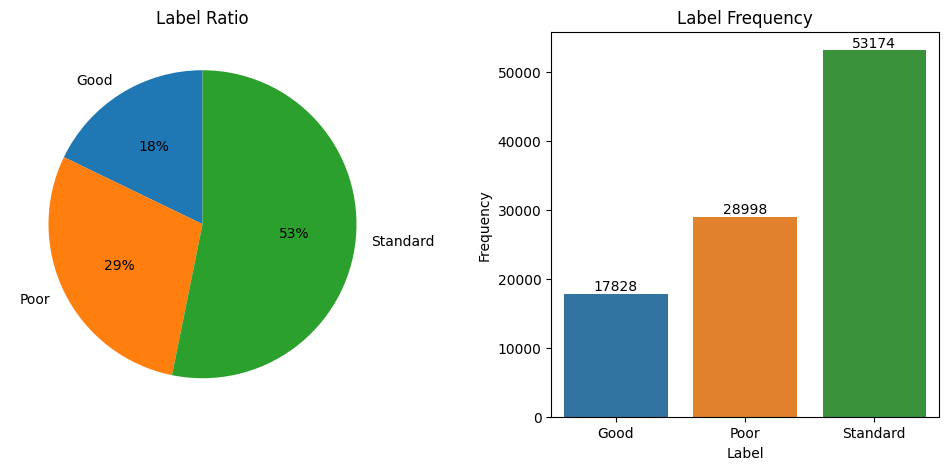

In [97]:
# Define target variable name
target_var = 'Credit_Score'

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Pie chart for label ratio
def plot_label_ratio(df, target='Credit_Score'):
    """
    Plot a pie chart to show the ratio of labels in the target variable.

    Parameters:
    - df: DataFrame
      The DataFrame containing the target variable.
    - target: str, optional (default='Credit_Score')
      The name of the target variable.
    """

    labels = df[target].value_counts().sort_index().index
    sizes = df[target].value_counts().sort_index().values
    axes[0].pie(sizes, labels=labels, autopct='%.0f%%', startangle=90)
    axes[0].set_title("Label Ratio")

plot_label_ratio(df, target_var)

# Second subplot: Bar plot for label frequency
def plot_label_frequency(df, target='Credit_Score'):
    """
    Plot a bar chart to show the frequency of each label in the target variable.

    Parameters:
    - df: DataFrame
      The DataFrame containing the target variable.
    - target: str, optional (default='Credit_Score')
      The name of the target variable.
    """

    group_sizes = df.groupby(target).size()
    sns.barplot(x=group_sizes.index, y=group_sizes, ax=axes[1])

    for index, value in enumerate(group_sizes):
        axes[1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

    axes[1].set_title("Label Frequency")
    axes[1].set_xlabel("Label")
    axes[1].set_ylabel("Frequency")

plot_label_frequency(df, target_var)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plots
plt.show()

# We can see that the dataset has data imbalance between labels

# Specifically, the number of instances labeled "Standard" is overwhelming 
# Compared to the other two labels

# This data imbalance can cause problems during model training (or evaluation) 
# So it needs attention

## 4.3.&nbsp;Categorical Variables Analysis

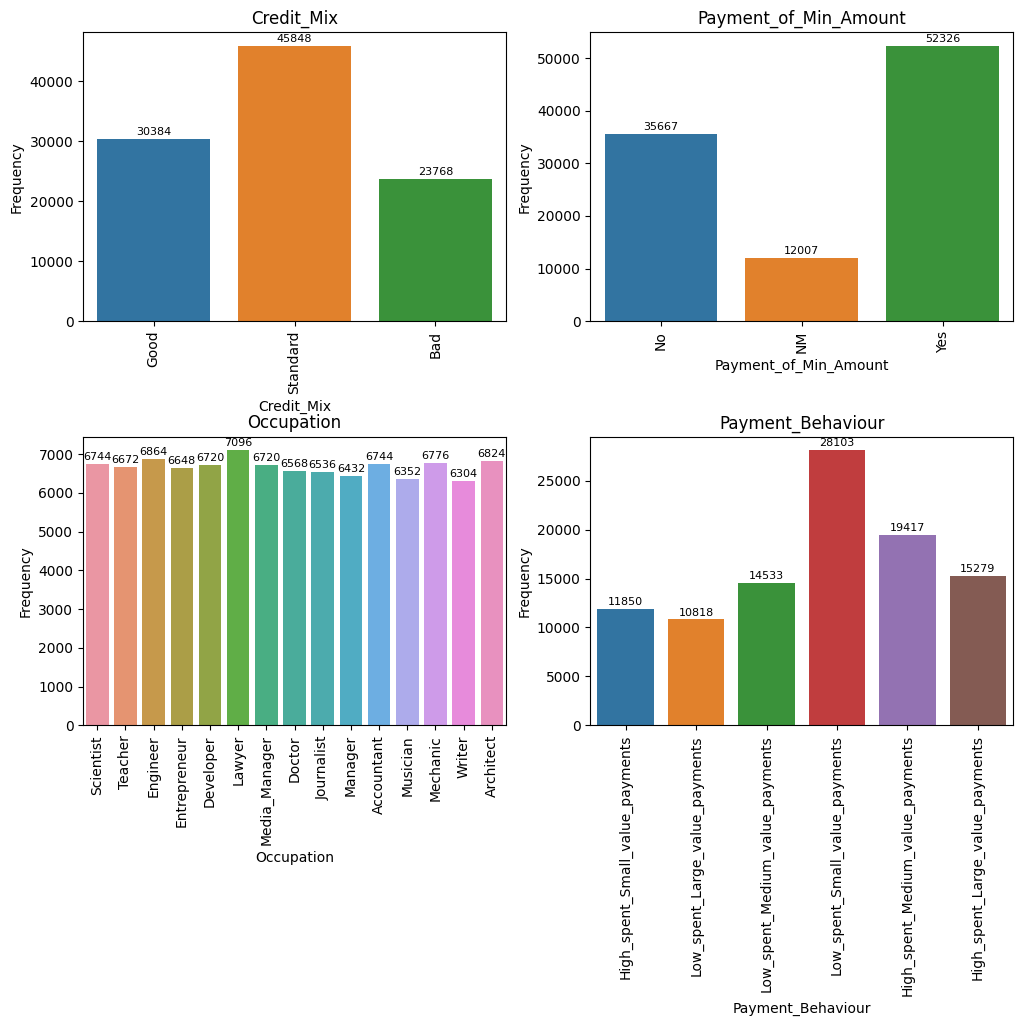

In [98]:
# Because the 'Name' column has many unique values, we will not analyze this column. 
# As for the 'Type_of_Loan' column, because each line contains a list of debt types, 
# We will analyze and process this column separately.

# Define the number of rows and columns
n_row = 2
n_col = 2

# Define the columns to be plotted in a 2x2 grid
cols = [["Credit_Mix", "Payment_of_Min_Amount"], ["Occupation", "Payment_Behaviour"]]

# Create subplots
fig, axs = plt.subplots(n_row, n_col, figsize=(12, 9))

# Adjust the vertical space between subplots
plt.subplots_adjust(hspace=0.4)

# Iterate over rows and columns
for i in range(n_row):
    for j in range(n_col):
        # Use Seaborn's countplot to visualize the frequency of each category in the specified column
        sns.countplot(x=cols[i][j], data=df, ax=axs[i][j])

        # Add frequency values on top of each bar
        for p in axs[i][j].patches:
            height = p.get_height()
            width = p.get_width()
            
            # Display the frequency value on top of each bar
            axs[i][j].annotate(f'{int(height)}', (p.get_x() + width / 2., height),
                               ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                               textcoords='offset points')

        # Set plot title, rotate x-axis labels for better readability, and label y-axis
        axs[i][j].set_title(cols[i][j])
        axs[i][j].tick_params(axis='x', labelrotation=90)
        axs[i][j].set_ylabel('Frequency')

# Display the plot
plt.show()

# Looking at the frequency bar charts, we can see that the 'Occupation' column 
# Has the most even distribution of categories. 
# The remaining columns have large or small differences in this distribution. 
# The biggest difference in classifications is in the column 'Payment_of_Min_Amount'

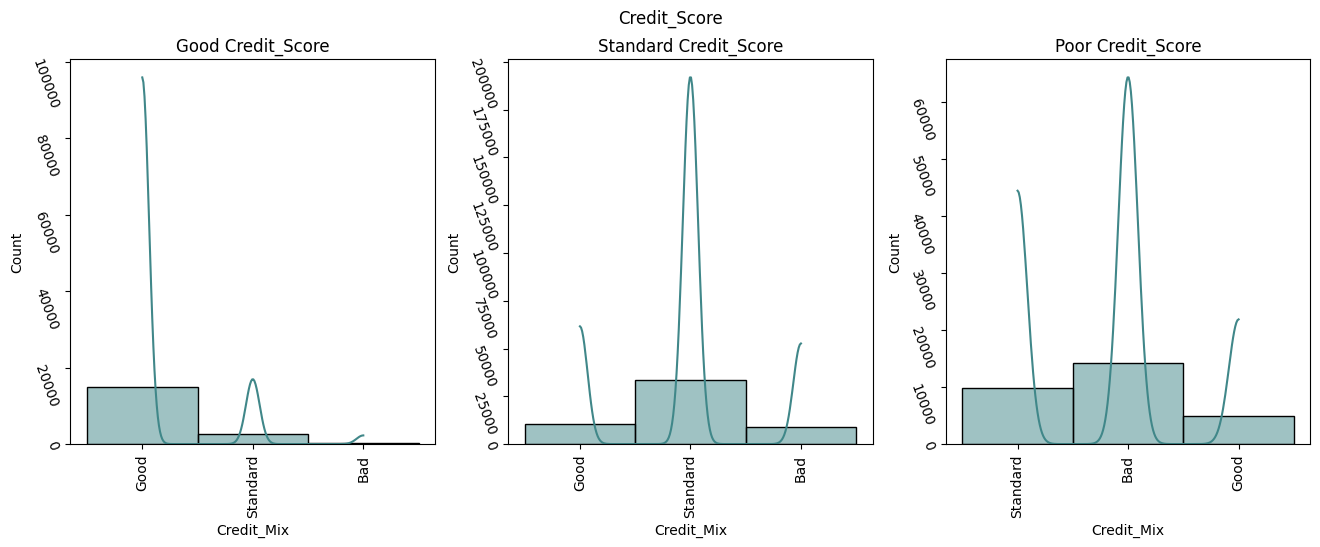

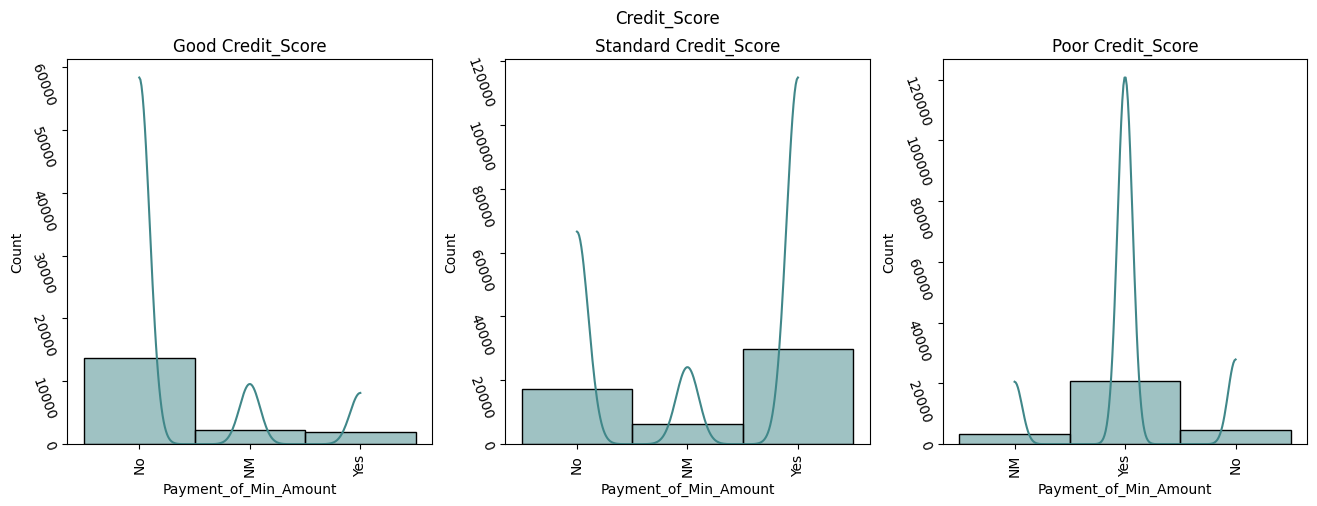

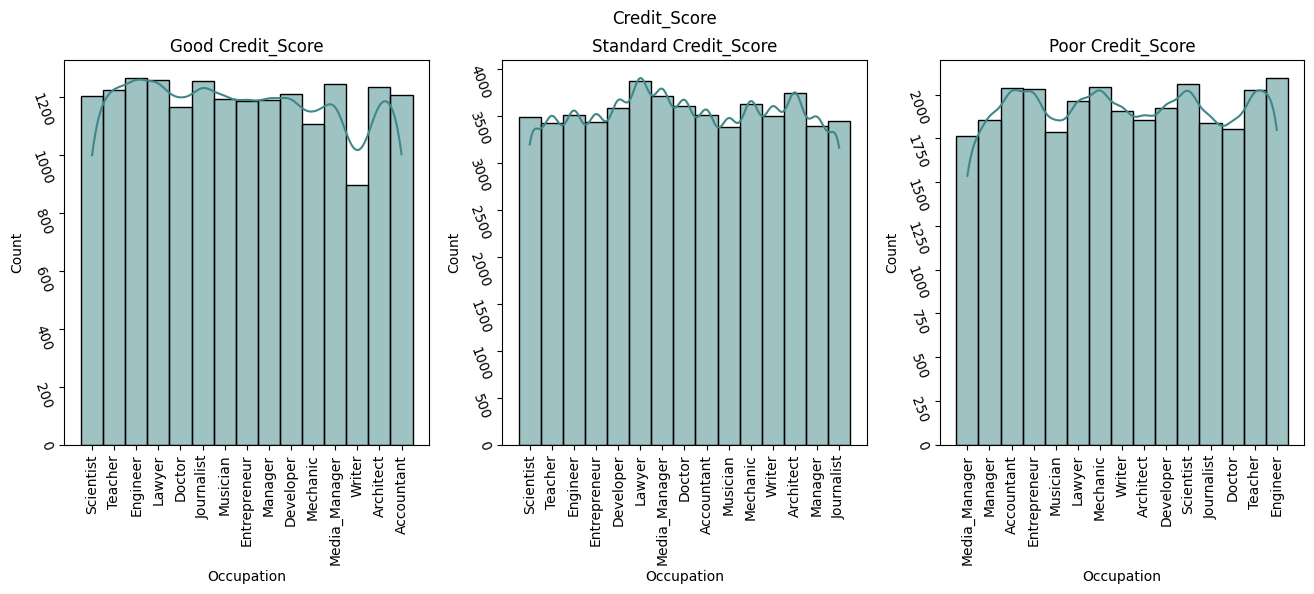

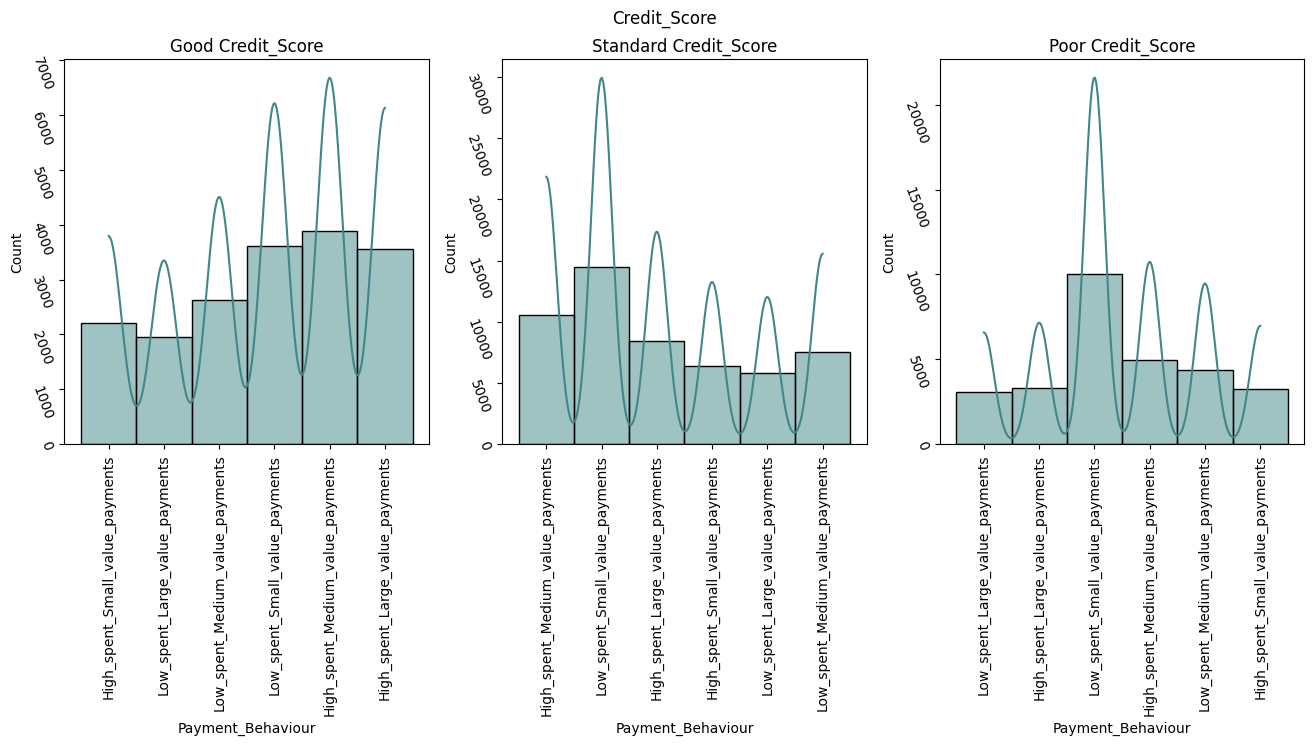

In [99]:
# List of features to compare
features = ["Credit_Mix", "Payment_of_Min_Amount", "Occupation", "Payment_Behaviour"]
# Feature for classification
feature2 = 'Credit_Score'

# Number of bins for histogram
bins = 30

# Loop through each feature for comparison
for feature1 in features:
    # Adjust number of bins if the number of unique values is less than 30
    if df[feature1].nunique() < 30:
        bins = df[feature1].nunique()

    # List of unique values in feature2
    unique_values_feature2 = df[feature2].unique().tolist()
    # Number of subplots
    num_subplots = len(unique_values_feature2)

    # Create subplots
    fig, axes = plt.subplots(1, num_subplots, sharey='none', figsize=[16, 5])

    # Set main title for the entire plot
    fig.suptitle(f'{feature2}')

    # Iterate through each unique value of feature2
    for i, value_feature2 in enumerate(unique_values_feature2):
        # Set title for each subplot
        axes[i].set_title(f'{value_feature2}\n{feature2}')

        # Customize axis labels
        axes[i].tick_params(axis='x', labelrotation=90)
        axes[i].tick_params(axis='y', labelrotation=-70)

        # Plot histogram for each category of feature2
        sns.histplot((df[feature1][df[feature2] == value_feature2]).dropna(),
                     bins=bins, ax=axes[i], kde=True, color='#408789')
        axes[i].set_title(f'{value_feature2} {feature2}')

    # Display the plot
    plt.show()

# Drawing a histogram combined with a kde curve helps us better understand 
# The relationship of each categorical variable to the target variable. 
# Specifically, at each label of the target variable, we will see 
# The distribution of labels of the categorical variable corresponding to 
# The target label we consider. Thereby, providing a more intuitive view of 
# The distribution of categorical variables through the target variable.

In [100]:
def unique_values_summary(column, separator=',', replace=''):
    """
    Get a summary of unique values from a column, 
    considering a specified separator and replacement.

    Parameters:
    - column: The column to extract unique values from.
    - separator: Separator character for splitting values.
    - replace: String to be replaced in values before processing.

    Returns:
    A dictionary with enumerated unique values.
    """

    unique_values = set()

    for value in column.dropna():
        # Check if the separator is present in the value
        if separator in value:
            # Split the value using the separator, capitalize first letter, 
            # Replace spaces with underscores
            unique_values.update(map(lambda x: x.strip().title().replace(' ', '_'),
                                     re.sub(replace, '', value).split(separator)))
        else:
            # Capitalize first letter, replace spaces with underscores
            unique_values.add(value.title().replace(' ', '_'))

    return dict(enumerate(sorted(unique_values)))

# Generate a summary of unique values in the 'Type_of_Loan' column
unique_values_summary(df['Type_of_Loan'])

# 'Type_of_Loan' is a list of customer loan types
# This column can be split into multiple columns (with boolean values) 
# Representing each type of loan

{0: 'Auto_Loan',
 1: 'Credit-Builder_Loan',
 2: 'Debt_Consolidation_Loan',
 3: 'Home_Equity_Loan',
 4: 'Mortgage_Loan',
 5: 'No_Data',
 6: 'Not_Specified',
 7: 'Payday_Loan',
 8: 'Personal_Loan',
 9: 'Student_Loan'}

## 4.4.&nbsp;Correlation Plot Between Numerical Variables

In [101]:
def correlation_plot(df=df):
    """
    Generate a correlation heatmap for numerical variables in the DataFrame.

    Parameters:
    - df: DataFrame, optional (default=df)
      The DataFrame containing numerical variables 
      for which the correlation heatmap will be generated.

    This function uses seaborn's heatmap to visualize 
    the correlation matrix of numerical variables in the DataFrame.
    The correlation values are annotated on the heatmap for easy interpretation.
    """
    
    # Set the figure size for the heatmap
    plt.figure(figsize=[12, 8])

    # Select numerical variables (exclude 'object' type) and drop rows with missing values
    numerical_df = df.select_dtypes(exclude='object').dropna()

    # Generate the correlation heatmap using seaborn
    sns.heatmap(numerical_df.corr(), annot=True, fmt='.1f', center=0, linewidth=.2)

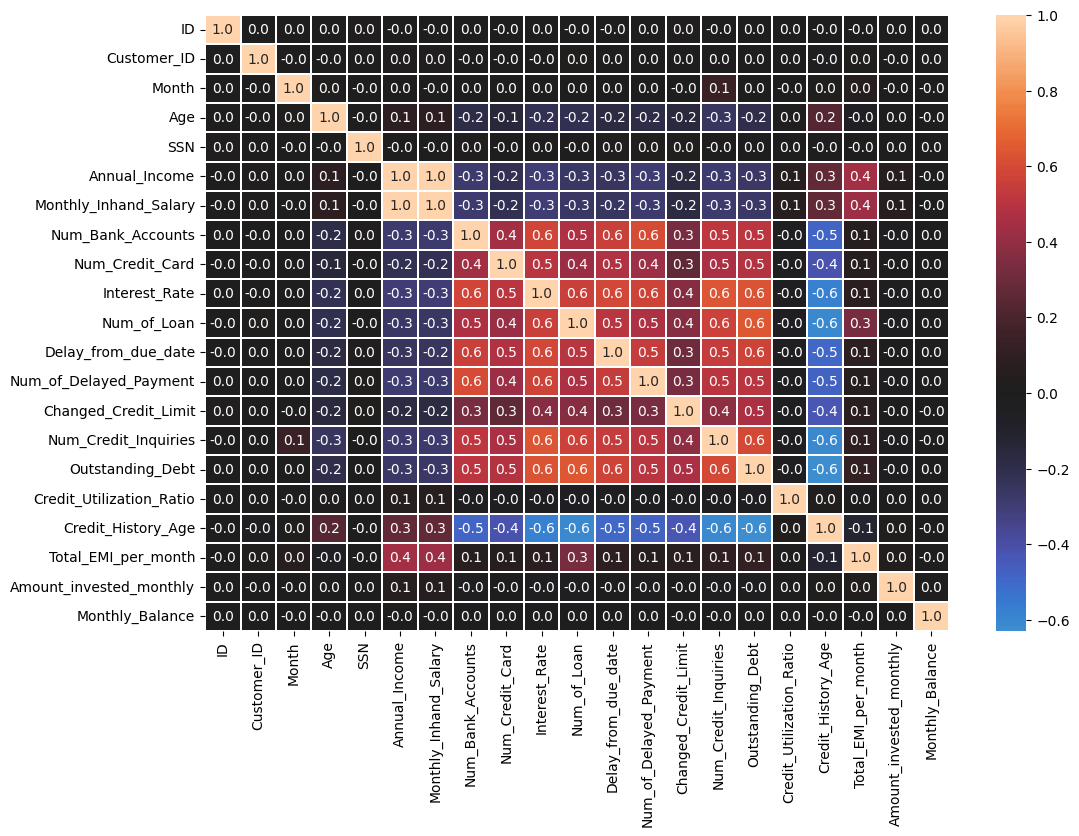

In [102]:
# Generate a correlation heatmap for numerical variables in the DataFrame.
correlation_plot()

# Positive correlations are shown in shades of red, indicating a positive linear relationship between variables.
# Negative correlations are shown in shades of blue, indicating a negative linear relationship between variables.

## 4.5.&nbsp;Numerical Variables Analysis

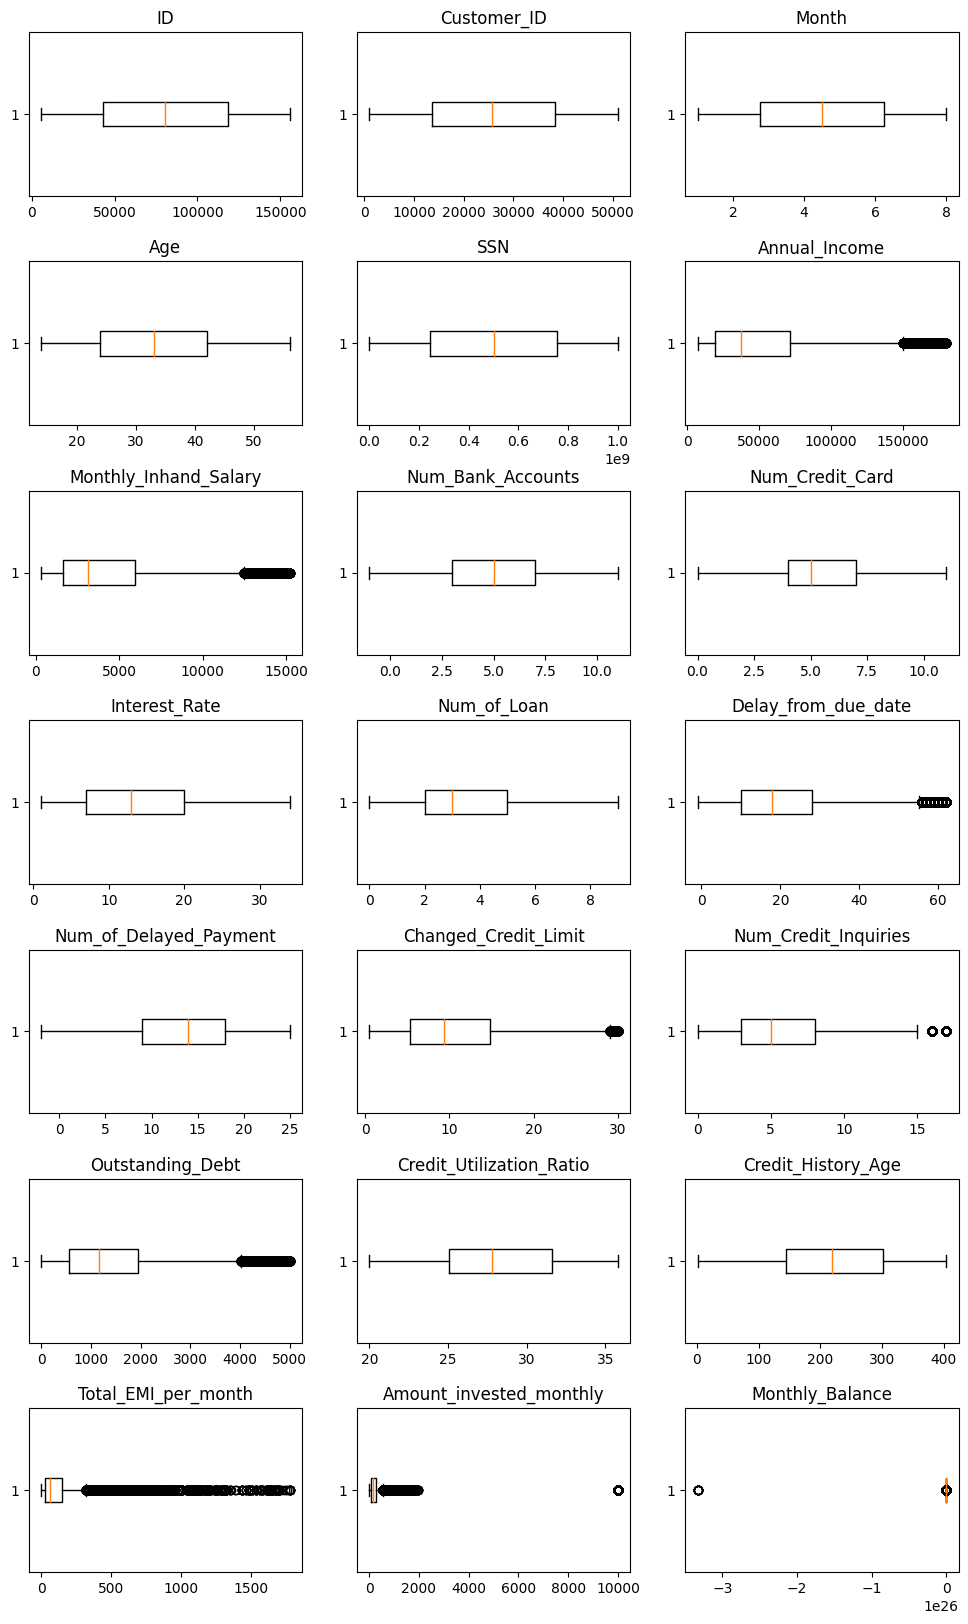

In [103]:
# Reshape the numeric_cols array into a matrix with dimensions (n_row, n_col)
numerical_cols = np.array(numerical_vars).reshape((7, 3))

# Number of rows and columns in the subplot grid
n_row = numerical_cols.shape[0]
n_col = numerical_cols.shape[1]

# Create a figure and axes for the subplot grid
fig, axs = plt.subplots(n_row, n_col, figsize=(12, 20))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Iterate through each row and column in the grid
for i in range(n_row):
    for j in range(n_col):
        # Draw a boxplot for each numeric variable
        axs[i][j].boxplot(df[numerical_cols[i][j]], vert=False)
        
        # Set the title for each subplot
        axs[i][j].set_title(numerical_cols[i][j])

# Display the plot
plt.show()

# Based on the chart below, we can see that in some features, there are many outliers
# Features with many outliers: Annual_Income, Monthly_Inhand_Salary, Delay_from_due_date,
# Changed_Credit_Limit, Outstanding_Debt, Total_EMI_per_month, 
# Amount_invested_monthly, Monthly_Balance

In [104]:
# Through research, we can know that EMI (Equated Monthly Installment) simply means 
# The customer's monthly installment payment. The more the customer spends, the higher 
# The EMI will be. Normally at banks EMI will come with certain terms and interest rates. 
# Therefore a person with very high EMI means that person has spent a lot and his/her monthly 
# Financial burden has also increased. Thus, EMI is an appropriate feature to predict Credit Score. 
# Having many outliers in the EMI column may be due to differences in consumer behavior 
# Among customers.
print(df.Total_EMI_per_month.describe(), '\n')

# If a person has significant EMIs compared to their monthly income, this could be 
# A sign of a person facing financial difficulties. Therefore, to more accurately evaluate 
# A person's financial situation, you should not only rely on EMI but also consider 
# That person's income (Monthly_Inhand_Salary).
print(df.Monthly_Inhand_Salary.describe(), '\n')

# So there is a need for a new feature to show the correlation between EMI and a person's income. 
# We will use the ratio between EMI and monthly income to represent this.
df["EMI_Income_Ratio"] = df.Total_EMI_per_month /  df.Monthly_Inhand_Salary
print(df.EMI_Income_Ratio.describe())

count    100000.000000
mean        107.699208
std         132.267056
min           0.000000
25%          29.268886
50%          66.462304
75%         147.392573
max        1779.103254
Name: Total_EMI_per_month, dtype: float64 

count    100000.000000
mean       4197.270835
std        3186.432497
min         303.645417
25%        1626.594167
50%        3095.905000
75%        5957.715000
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64 

count    100000.000000
mean          0.029797
std           0.031453
min           0.000000
25%           0.012129
50%           0.024409
75%           0.040346
max           1.979212
Name: EMI_Income_Ratio, dtype: float64


                       Annual_Income  Monthly_Inhand_Salary
Annual_Income               1.000000               0.998154
Monthly_Inhand_Salary       0.998154               1.000000 



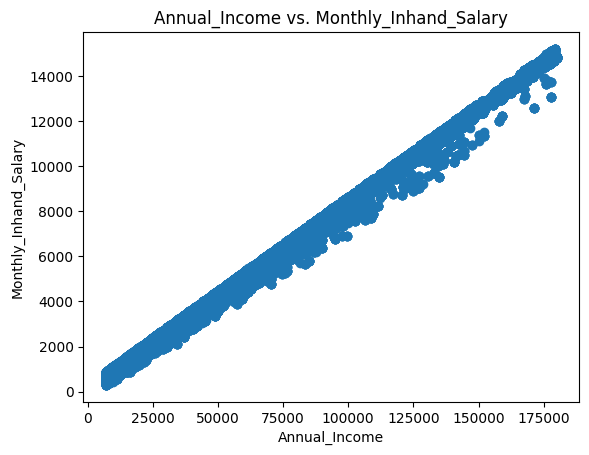

In [105]:
# We can see that Annual_Income (annual income) and Monthly_Inhand_Salary (monthly salary) 
# Both have many outliers. However, this can be explained by the difference in income 
# Between customers. Accordingly, there will be some individuals with significantly higher incomes 
# Compared to the rest

# In addition, we can easily see that Annual_Income has a close relationship with 
# Monthly_Inhand_Salary, specifically these two values will tend to be proportional to each other. 
# So, can we use one of these two values to represent the other value?
print(df[["Annual_Income", "Monthly_Inhand_Salary"]].corr(), '\n')

# With a correlation of approximately 1.0, we can be sure of the positive relationship 
# Between Annual_Income and Monthly_Inhand_Salary
plt.scatter(df.Annual_Income, df.Monthly_Inhand_Salary)

plt.xlabel("Annual_Income")
plt.ylabel("Monthly_Inhand_Salary")
plt.title("Annual_Income vs. Monthly_Inhand_Salary")

plt.show()

# Based on the chart below, it can be seen that there are some customers who have annual income 
# Although the monthly income is very little or almost non-existent. Therefore, using only 
# Annual_Income or Monthly_Inhand_Salary may not accurately assess a person's financial capacity, 
# So we need to consider both of these values.

# 5.&nbsp;Preprocessing

In [106]:
# Generate a summary of unique values in the 'Type_of_Loan' column
unique_type_of_loan = unique_values_summary(df['Type_of_Loan']).values()

# Create a new DataFrame with columns for each unique loan type and fill with zeros
new_df = pd.DataFrame.from_dict({type_loan: [0] * df.shape[0] for type_loan in unique_type_of_loan})

# Concatenate the new DataFrame with the original DataFrame along columns
df = pd.concat((df, new_df), axis=1)

# Iterate through each row in the DataFrame
for _, row in df.iterrows():
    # Extract and preprocess loan types from the 'Type_of_Loan' column
    type_of_loan = list(map(lambda x: x.strip().title().replace(' ', '_'), row['Type_of_Loan'].split(",")))
    
    # Update the corresponding columns based on the presence of loan types
    df.loc[_, list(unique_type_of_loan)] = np.isin(list(unique_type_of_loan),
                                                   type_of_loan,
                                                   assume_unique=True).astype(int)

# Drop unnecessary columns from the DataFrame
df.drop(columns=['Type_of_Loan', 'ID', 'Name', 'SSN', 'Customer_ID'], inplace=True)

# Move 'Credit_Score' column to the end of the dataframe
credit_score = df.pop('Credit_Score')
df['Credit_Score'] = credit_score

# 6.&nbsp;Save Data

In [107]:
# Information about the attributes after preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [108]:
# Display the first 5 rows of the dataset.
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit-Builder_Loan,Debt_Consolidation_Loan,Home_Equity_Loan,Mortgage_Loan,No_Data,Not_Specified,Payday_Loan,Personal_Loan,Student_Loan,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,...,1,0,1,0,0,0,0,1,0,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,1,0,1,0,0,0,0,1,0,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,1,0,1,0,0,0,0,1,0,Good


## 6.1.&nbsp;Clean Data

In [109]:
# Save the preprocessed data to a CSV file named 'CreditScore_Clean.csv'
df.to_csv('../../Experiment/Dataset/Cleaned/CreditScore_Clean.csv', index=False)

## 6.2.&nbsp;Label Encoder Data

In [ ]:
# Extracting categorical variables by selecting columns with data type "object" in the DataFrame.
categorical_vars = df.select_dtypes(include="object").columns

# Remove the column with the name "Credit Score" from the categorical variables.
# Using drop method with errors="ignore" to avoid errors if "Credit Score" is not present.
categorical_vars = categorical_vars.drop("Credit_Score", errors="ignore")

# Create a copy of the DataFrame df and save it as df_label.
df_label = df.copy()

# Apply Label Encoding to each categorical column.
label_encoder = LabelEncoder()
for col in categorical_vars:
    df_label[col] = label_encoder.fit_transform(df_label[col])

In [ ]:
# Save the preprocessed data with Label Encoding to a CSV file named 'CreditScore_Label.csv'.
df_label.to_csv('../../Experiment/Dataset/Cleaned/CreditScore_Label.csv', index=False)

## 6.3.&nbsp;One Hot Encoder Data

In [ ]:
# Create a copy of the DataFrame df and save it as df_onehot.
df_onehot = df.copy()

# Apply One-Hot Encoding to categorical columns in the DataFrame.
df_onehot = pd.get_dummies(df_onehot, columns=categorical_vars, prefix=categorical_vars)

# Pop "Credit_Score" column and save it to the variable 'credit_score'.
credit_score = df_onehot.pop("Credit_Score")

# Add the 'Credit_Score' column to the end of the DataFrame.
df_onehot["Credit_Score"] = credit_score

In [ ]:
# # Lưu bộ dữ liệu đã được tiền xử lý ở định dạng csv với tên là 'CreditScore_OneHot.csv'
df_onehot.to_csv('../../Experiment/Dataset/Cleaned/CreditScore_OneHot.csv', index=False)